# WeatherPy
----

## Import dependencies

In [1]:
import numpy as np
import requests
import scipy.stats as st
from scipy import stats

# Import Pandas library
import pandas as pd

#Import matplotlib for creating and plotting graphs
import matplotlib.pyplot as plt
from datetime import datetime

# Import API key
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Import random to generate random latitude and longitudes
import random 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

degree_sign = u'\N{DEGREE SIGN}'

## Generate Cities List

In [2]:
# Create empty lists for recording Cities and latitude = (-90, 90) / longitude = (-180, 180)
# Range of latitudes and longitudes

cities = []

while len(cities)<500: # iterate through loop until the cities list contains 500 random cities appended
    x = (random.choice(range(-90, 90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)

# Print the city count

len(cities)

500

In [3]:
cities

['hermanus',
 'pierre',
 'victoria',
 'punta arenas',
 'rikitea',
 'hilo',
 'marsh harbour',
 'salgar',
 'avera',
 'albany',
 'guerrero negro',
 'avarua',
 'vaini',
 'taolanaro',
 'verkhnyaya inta',
 'meulaboh',
 'saint-philippe',
 'hobart',
 'sept-iles',
 'bluff',
 'georgetown',
 'myanaung',
 'tuktoyaktuk',
 'illoqqortoormiut',
 'san cristobal',
 'peyima',
 'mataura',
 'bathsheba',
 'puerto ayora',
 'cape town',
 'ancud',
 'lorengau',
 'khatanga',
 'bredasdorp',
 'palabuhanratu',
 'matara',
 'faanui',
 'marawi',
 'ilulissat',
 'new norfolk',
 'busselton',
 'tawkar',
 'amderma',
 'arraial do cabo',
 'luanda',
 'ushuaia',
 'malakal',
 'namibe',
 'charters towers',
 'tambacounda',
 'ostrovnoy',
 'thompson',
 'oktyabrskiy',
 'narsaq',
 'north bend',
 'butaritari',
 'hasaki',
 'asau',
 'nizhneyansk',
 'ribeira grande',
 'tasiilaq',
 'haines junction',
 'port elizabeth',
 'jupiter',
 'grand river south east',
 'toktogul',
 'gillette',
 'erie',
 'jamestown',
 'saint-augustin',
 'iwaki',
 'kr

In [4]:
city_stats = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=victoria").json()

In [5]:
city_stats

{'coord': {'lon': 114.1577, 'lat': 22.2855},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 23.62,
  'feels_like': 24.15,
  'temp_min': 20.56,
  'temp_max': 25,
  'pressure': 1008,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.01, 'deg': 264, 'gust': 5.44},
 'clouds': {'all': 0},
 'dt': 1619109634,
 'sys': {'type': 3,
  'id': 2035800,
  'country': 'HK',
  'sunrise': 1619128620,
  'sunset': 1619174765},
 'timezone': 28800,
 'id': 1819729,
 'name': 'Hong Kong',
 'cod': 200}

In [6]:
city_stats["main"]

{'temp': 23.62,
 'feels_like': 24.15,
 'temp_min': 20.56,
 'temp_max': 25,
 'pressure': 1008,
 'humidity': 81}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count = 1 # counter to count the number of calls to API
sets = 1 # counter to count the number of call sets

# Create empty lists to store the data for each field
city_name_list = []
lat_list = []
lng_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
country_list = []
date_list = []

print(f'Beginning Data Retrieval \n ........................')

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    city_stats = requests.get(query_url + city).json()
    
    # Retrieve the items for each field and append to the empty lists  
    try:
            
        city_name = city_stats['name']
        city_name_list.append(city_name)
        
        lat = city_stats['coord']['lat']
        lat_list.append(lat)
        
        lng = city_stats['coord']['lon']
        lng_list.append(lng)
        
        temp = city_stats['main']['temp_max']
        temp_list.append(temp)
        
        humidity = city_stats['main']['humidity']
        humidity_list.append(humidity)
        
        clouds = city_stats['clouds']['all']
        clouds_list.append(clouds)
        
        wind_speed = city_stats['wind']['speed']
        wind_speed_list.append(wind_speed)

        country_name = city_stats['sys']['country']
        country_list.append(country_name)
        
        date = city_stats['dt']
        date_list.append(date)

        print(f'Processing Record {count} of Set {sets} | {city}')
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("City not found. Skipping...")
        
print(f'........................\n Data Retrieval Complete \n ........................')


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | hermanus
Processing Record 1 of Set 1 | pierre
Processing Record 1 of Set 1 | victoria
Processing Record 1 of Set 1 | punta arenas
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | hilo
Processing Record 1 of Set 1 | marsh harbour
Processing Record 1 of Set 1 | salgar
Processing Record 1 of Set 1 | avera
Processing Record 1 of Set 1 | albany
Processing Record 1 of Set 1 | guerrero negro
Processing Record 1 of Set 1 | avarua
Processing Record 1 of Set 1 | vaini
City not found. Skipping...
Processing Record 1 of Set 1 | verkhnyaya inta
Processing Record 1 of Set 1 | meulaboh
Processing Record 1 of Set 1 | saint-philippe
Processing Record 1 of Set 1 | hobart
Processing Record 1 of Set 1 | sept-iles
Processing Record 1 of Set 1 | bluff
Processing Record 1 of Set 1 | georgetown
Processing Record 1 of Set 1 | myanaung
Processing Record 1 of Set 1 | tuktoyaktuk
City not found. Skipping...
Pr

Processing Record 1 of Set 1 | aksu
Processing Record 1 of Set 1 | ixtapa
Processing Record 1 of Set 1 | bambous virieux
Processing Record 1 of Set 1 | bambanglipuro
Processing Record 1 of Set 1 | douentza
Processing Record 1 of Set 1 | kaabong
Processing Record 1 of Set 1 | carballo
Processing Record 1 of Set 1 | port alfred
Processing Record 1 of Set 1 | makakilo city
Processing Record 1 of Set 1 | cockburn town
Processing Record 1 of Set 1 | san patricio
Processing Record 1 of Set 1 | staropyshminsk
Processing Record 1 of Set 1 | qui nhon
City not found. Skipping...
Processing Record 1 of Set 1 | aswan
Processing Record 1 of Set 1 | nanortalik
Processing Record 1 of Set 1 | lompoc
City not found. Skipping...
Processing Record 1 of Set 1 | fortuna
Processing Record 1 of Set 1 | beian
Processing Record 1 of Set 1 | vostok
Processing Record 1 of Set 1 | broome
Processing Record 1 of Set 1 | nelson bay
Processing Record 1 of Set 1 | impfondo
Processing Record 1 of Set 1 | inongo
Process

City not found. Skipping...
Processing Record 1 of Set 1 | mandera
Processing Record 1 of Set 1 | shirokiy
Processing Record 1 of Set 1 | yatou
Processing Record 1 of Set 1 | katra
Processing Record 1 of Set 1 | tilichiki
Processing Record 1 of Set 1 | eureka
Processing Record 1 of Set 1 | egvekinot
Processing Record 1 of Set 1 | sambava
Processing Record 1 of Set 1 | lobito
Processing Record 1 of Set 1 | beckley
Processing Record 1 of Set 1 | olinda
Processing Record 1 of Set 1 | alyangula
Processing Record 1 of Set 1 | paamiut
Processing Record 1 of Set 1 | sinnamary
Processing Record 1 of Set 1 | springbok
Processing Record 1 of Set 1 | ocean city
Processing Record 1 of Set 1 | uporovo
Processing Record 1 of Set 1 | warrington
Processing Record 1 of Set 1 | poli
Processing Record 1 of Set 1 | anori
Processing Record 1 of Set 1 | bara
Processing Record 1 of Set 1 | calvinia
Processing Record 1 of Set 1 | samarina
Processing Record 1 of Set 1 | yantal
Processing Record 1 of Set 1 | ki

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print(len(city_name_list))
print(len(lat_list))
print(len(lng_list))   
print(len(temp_list))         
print(len(humidity_list))   
print(len(clouds_list))    
print(len(wind_speed_list))       
print(len(country_list))    
print(len(date_list))


462
462
462
462
462
462
462
462
462


In [9]:
# Convert and display data in dataframe

cities_df = pd.DataFrame({
                'City': city_name_list,
                'Lat': lat_list, 
                'Lng': lng_list, 
                'Max Temp': temp_list,
                'Humidity': humidity_list, 
                'Clouds': clouds_list,
                'Wind Speed': wind_speed_list,
                'Country': country_list, 
                'Date': date_list})

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,21.67,67,31,4.59,ZA,1619109788
1,Pierre,44.3683,-100.3510,12.00,32,1,9.77,US,1619109639
2,Hong Kong,22.2855,114.1577,25.00,81,0,4.01,HK,1619109634
3,Punta Arenas,-53.1500,-70.9167,10.00,81,75,4.63,CL,1619109788
4,Rikitea,-23.1203,-134.9692,25.42,74,69,8.47,PF,1619109788


In [10]:
# Export to .csv file
cities_df.to_csv("../output_data/cities.csv", index=False, header=True)

In [11]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,4.620000e+02
mean,19.671034,19.581408,16.327489,66.770563,57.140693,3.887641,1.619110e+09
std,33.085013,92.203724,12.344030,23.021337,37.275892,2.478990,5.247446e+01
min,-54.800000,-179.166700,-24.740000,5.000000,0.000000,0.060000,1.619109e+09
25%,-8.417175,-59.908325,8.315000,52.000000,20.000000,2.060000,1.619110e+09
50%,20.804400,25.985050,18.480000,72.000000,71.000000,3.475000,1.619110e+09
75%,46.525575,102.264975,26.000000,85.750000,92.000000,5.140000,1.619110e+09
max,78.218600,179.316700,41.110000,100.000000,100.000000,16.980000,1.619110e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
cities_df.loc[cities_df['Humidity'] >100].count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Clouds        0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

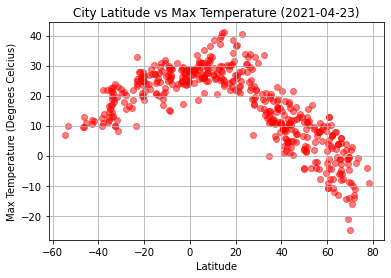

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Degrees Celcius)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

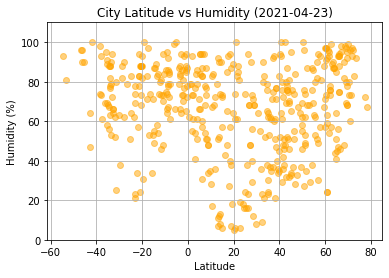

In [14]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color='orange', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.ylim(0,(cities_df["Humidity"].max()+10))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

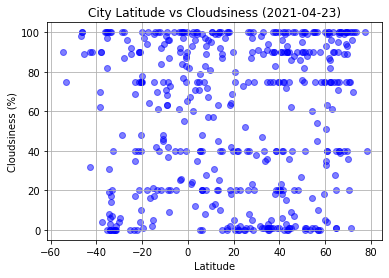

In [15]:
plt.scatter(cities_df["Lat"], cities_df["Clouds"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudsiness (%)')
plt.title(f'City Latitude vs Cloudsiness ({datetime.now().date()})')
plt.ylim(-5,(cities_df["Clouds"].max()+5))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

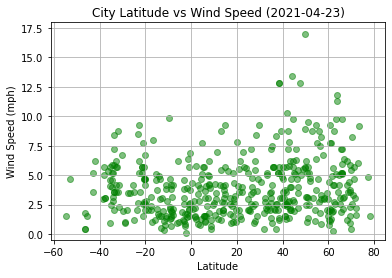

In [16]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color='g', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.ylim(-0.5,(cities_df["Wind Speed"].max()+1))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsWind.png")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
hemisphere_df = cities_df['Lat'] > 0
nth_hemisphere = cities_df[hemisphere_df]
sth_hemisphere = cities_df[~hemisphere_df]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.57x + 35.28
The r-value is: 0.7763502896973469


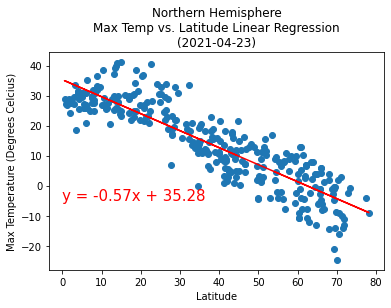

In [18]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Degrees Celcius)')
plt.title(f'Northern Hemisphere\nMax Temp vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(0,-5),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_TempVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.34x + 28.85
The r-value is: 0.5394579033119932


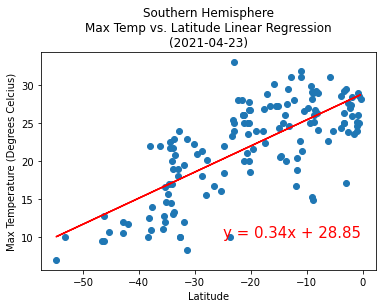

In [19]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Degrees Celcius)')
plt.title(f'Southern Hemisphere\nMax Temp vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-25,10),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_TempVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26x + 53.04
The r-value is: 0.0521211839881172


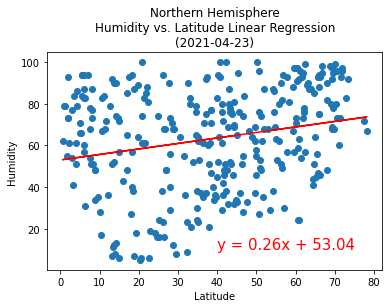

In [20]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Humidity"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere\nHumidity vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(40,10),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_HumidityVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.06x + 75.88
The r-value is: 0.0020829529486292345


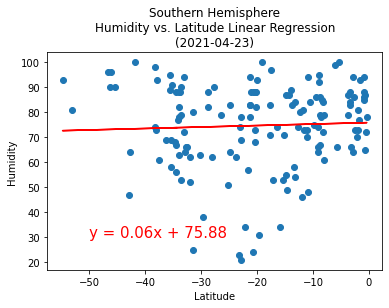

In [21]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Humidity"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere\nHumidity vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-50,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_HumidityVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.23x + 48.05
The r-value is: 0.01643293140702114


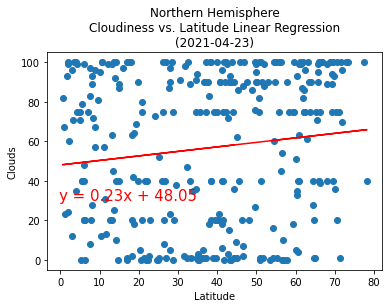

In [22]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Clouds"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title(f'Northern Hemisphere\nCloudiness vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-.25,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_CloudinessVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x + 66.59
The r-value is: 0.023672361596727327


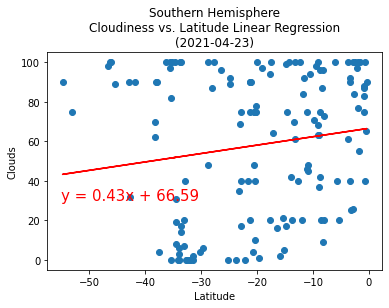

In [23]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Clouds"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title(f'Southern Hemisphere\nCloudiness vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-55,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_CloudinessVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 3.2
The r-value is: 0.03577057159856376


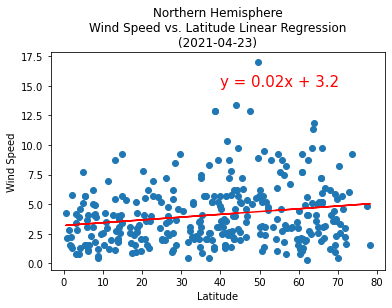

In [24]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Wind Speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere\nWind Speed vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(40,15),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_Wind SpeedVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x + 2.74
The r-value is: 0.05037979330789142


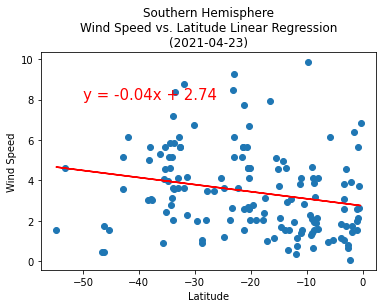

In [25]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Wind Speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere\nWind Speed vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-50,8),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_Wind SpeedVsLat_LinearReg.png")
plt.show()

##  Observation Summary

1. Temperatures decrease as the latitude increases towards the northern hemisphere, compared to the temperatures as we move down towards southern hemisphere.

2. Humidity is higher in cities with higher temperatures than in cities with lower temperatures.

3. Looking at all of the trends, we can see that latitude has a direct impact on temperatures, but not so much on humidity, cloudiness, or windspeed. These three variables (humidity, cloudiness, and windspeed) are more specifically related to temperatures, therefore plotting these three variables against temperatures rather than Latitude would yield more conclusive results.